<h1 style="text-align: center;">Meteorite Landings</h1>

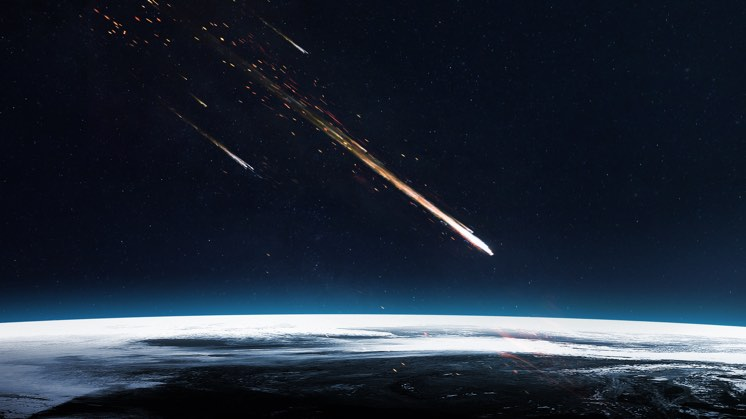

##### Exploratory Data Analysis

This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings. The Fusion Table is collected by Javier de la Torre and includes the following fields:

- type_of_meteorite
- mass_g
- fell_found
- year
- longitude
- latitude
- geolocation

In [1]:
# Import General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import requests
from io import StringIO

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame  

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## API Query

The requests package was imported to extract a csv file from NASA's API.
Error code is printed as a check if the request is denied.

In [2]:
# Base URL for the NASA meteorite Archive API
query = f'https://data.nasa.gov/resource/gh4g-9sfh.csv?$limit=45716'

# Send an HTTP GET request to the API endpoint
response = requests.get(query)

# Check if the request was successful
if response.status_code == 200:
    text_data = response.text
    df = pd.read_csv(StringIO(text_data), sep=',')
    
else:
    print(f"Error: {response.status_code}")

## Exploring the data

The dataframe columns and format is checked using head and info methods.

In [3]:
df.head(10)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919-01-01T00:00:00.000,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949-01-01T00:00:00.000,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01T00:00:00.000,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930-01-01T00:00:00.000,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920-01-01T00:00:00.000,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   geolocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


## Cleaning the data

The data is checked for NAN values and then removed. The year of the meteorite landings are formatted in a cleaner manner as integers.

In [5]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            291
reclat         7315
reclong        7315
geolocation    7315
dtype: int64

In [6]:
# Select all columns except the ones to exclude
new_df = df.dropna()

In [7]:
new_df.shape

(38115, 10)

In [8]:
new_df['year'] = new_df['year'].apply(lambda x: int(x[0:4]))

## Final check on the state of the data

The head of the new cleaned data is checked.

In [9]:
# Display the first 10 rows of the filtered DataFrame
new_df.head(10)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,1814,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920,-30.86667,-64.55000,"(-30.86667, -64.55)"


# Visualising the data

### Continuous Data

Histograms are plotted to see the distribution of the continuous data. The mass data is scaled logarithmically to view the data better. 

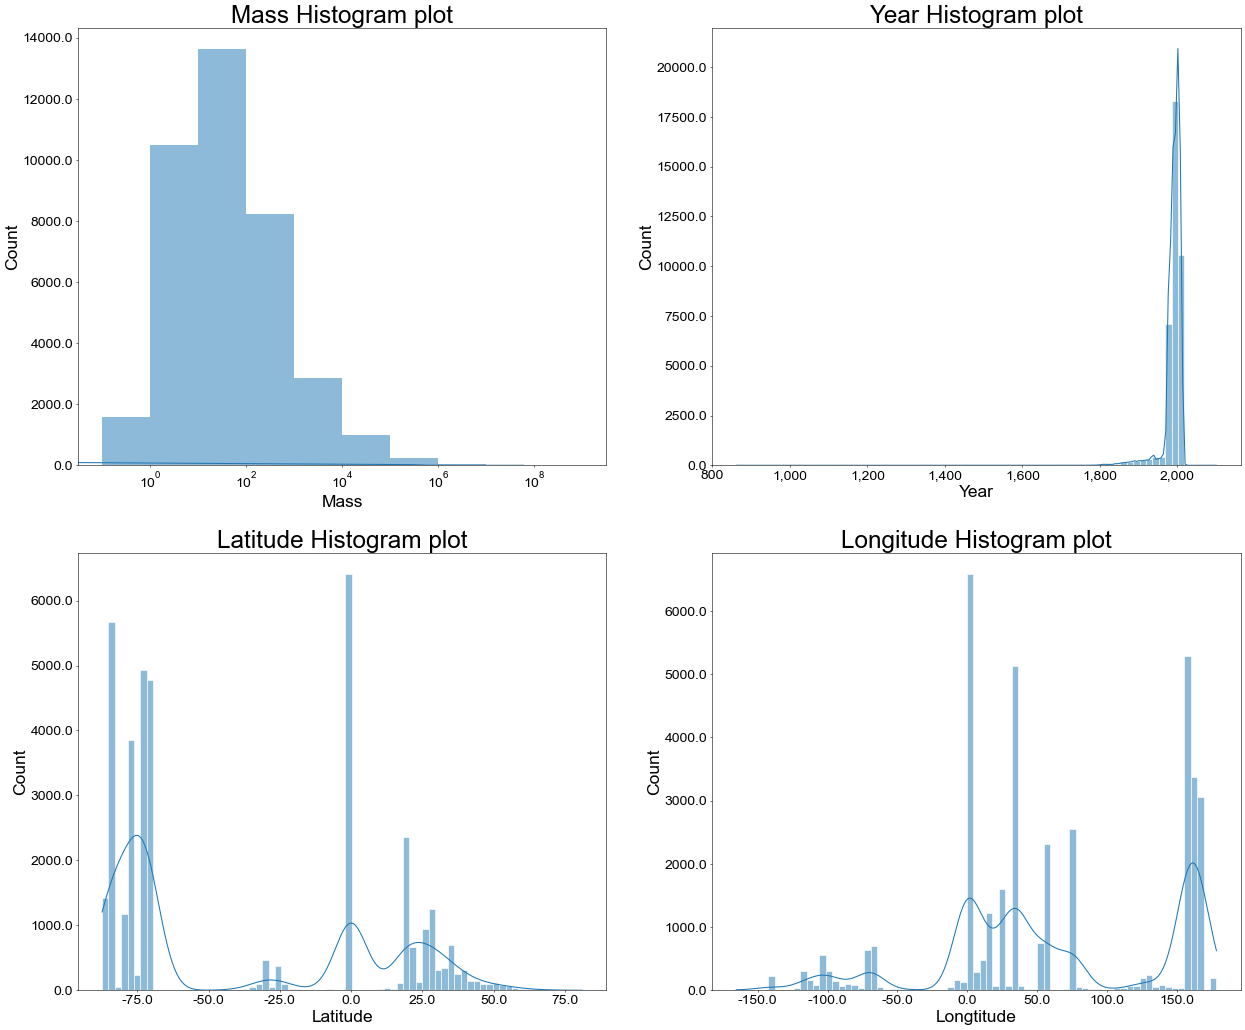

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(30, 25),dpi = 50)

# Flattening the array makes indexing easier
axes = axes.ravel()  
sns.set(style='darkgrid') 


# Mass Histogram plot and formatting with a logarithmic x axis
masshist = sns.histplot(data=new_df, x="mass", bins=np.logspace(np.log10(0.1),np.log10(1e9), 11), kde=True, ax=axes[0]);
masshist.set_title('Mass Histogram plot', size=35)
masshist.set_xlabel('Mass', fontdict={'size': 25});
masshist.set_ylabel('Count', fontdict={'size': 25});
masshist.set_xticklabels(masshist.get_xticks(), size = 20);
masshist.set_yticklabels(masshist.get_yticks(), size = 20);
masshist.set_xscale("log")

# Year of Discovery Histogram plot and formatting
yearhist = sns.histplot(data=new_df, x="year", bins=75, kde=True, ax=axes[1]);
yearhist.set_title('Year Histogram plot', size=35)
yearhist.set_xlabel('Year', fontdict={'size': 25});
yearhist.set_ylabel('Count', fontdict={'size': 25});
yearhist.set_xticklabels(yearhist.get_xticks(), size = 20);
yearhist.set_yticklabels(yearhist.get_yticks(), size = 20);
xlabels = ['{:,.0f}'.format(x) for x in yearhist.get_xticks()]
yearhist.set_xticklabels(xlabels)

# Latitude Histogram plot and formatting
reclathist = sns.histplot(data=new_df, x="reclat", bins=75, kde=True, ax=axes[2]);
reclathist.set_title('Latitude Histogram plot', size=35)
reclathist.set_xlabel('Latitude', fontdict={'size': 25});
reclathist.set_ylabel('Count', fontdict={'size': 25});
reclathist.set_xticklabels(reclathist.get_xticks(), size = 20);
reclathist.set_yticklabels(reclathist.get_yticks(), size = 20);

# Longitude Histogram plot and formatting
reclonghist = sns.histplot(data=new_df, x="reclong", bins=75, kde=True, ax=axes[3]);
reclonghist.set_title('Longitude Histogram plot', size=35)
reclonghist.set_xlabel('Longtitude', fontdict={'size': 25});
reclonghist.set_ylabel('Count', fontdict={'size': 25});
reclonghist.set_xticklabels(reclonghist.get_xticks(), size = 20);
reclonghist.set_yticklabels(reclonghist.get_yticks(), size = 20);

### Categorical Data

The "fall" column has binary outputs whether the meteorite was found or fell. A bar chart and pie chart can be used in this occassion. 

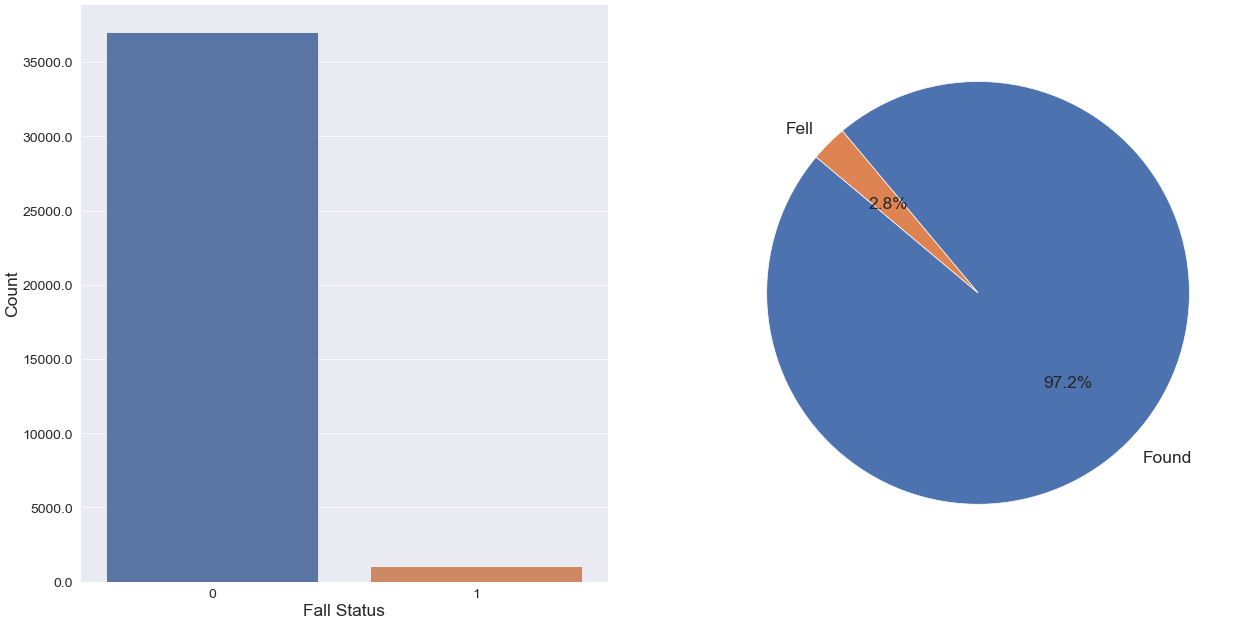

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(30, 15),dpi = 50)

# Bar chart plot and formatting
value_counts = new_df['fall'].value_counts()
fallbar = sns.barplot(data=new_df, x=value_counts.index, y=value_counts, ax=axes[0]);
fallbar.set_xlabel('Fall Status', fontdict={'size': 25});
fallbar.set_ylabel('Count', fontdict={'size': 25});
fallbar.set_xticklabels(fallbar.get_xticks(), size = 20);
fallbar.set_yticklabels(fallbar.get_yticks(), size = 20);

# Pie chart plot and formatting
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 25})
axes[1].axis('off')
plt.show()


A bar chart can be used to show the meteorites belonging to each class. The plot has been cut off to only classes above 25 counts due to the number of unique classes.

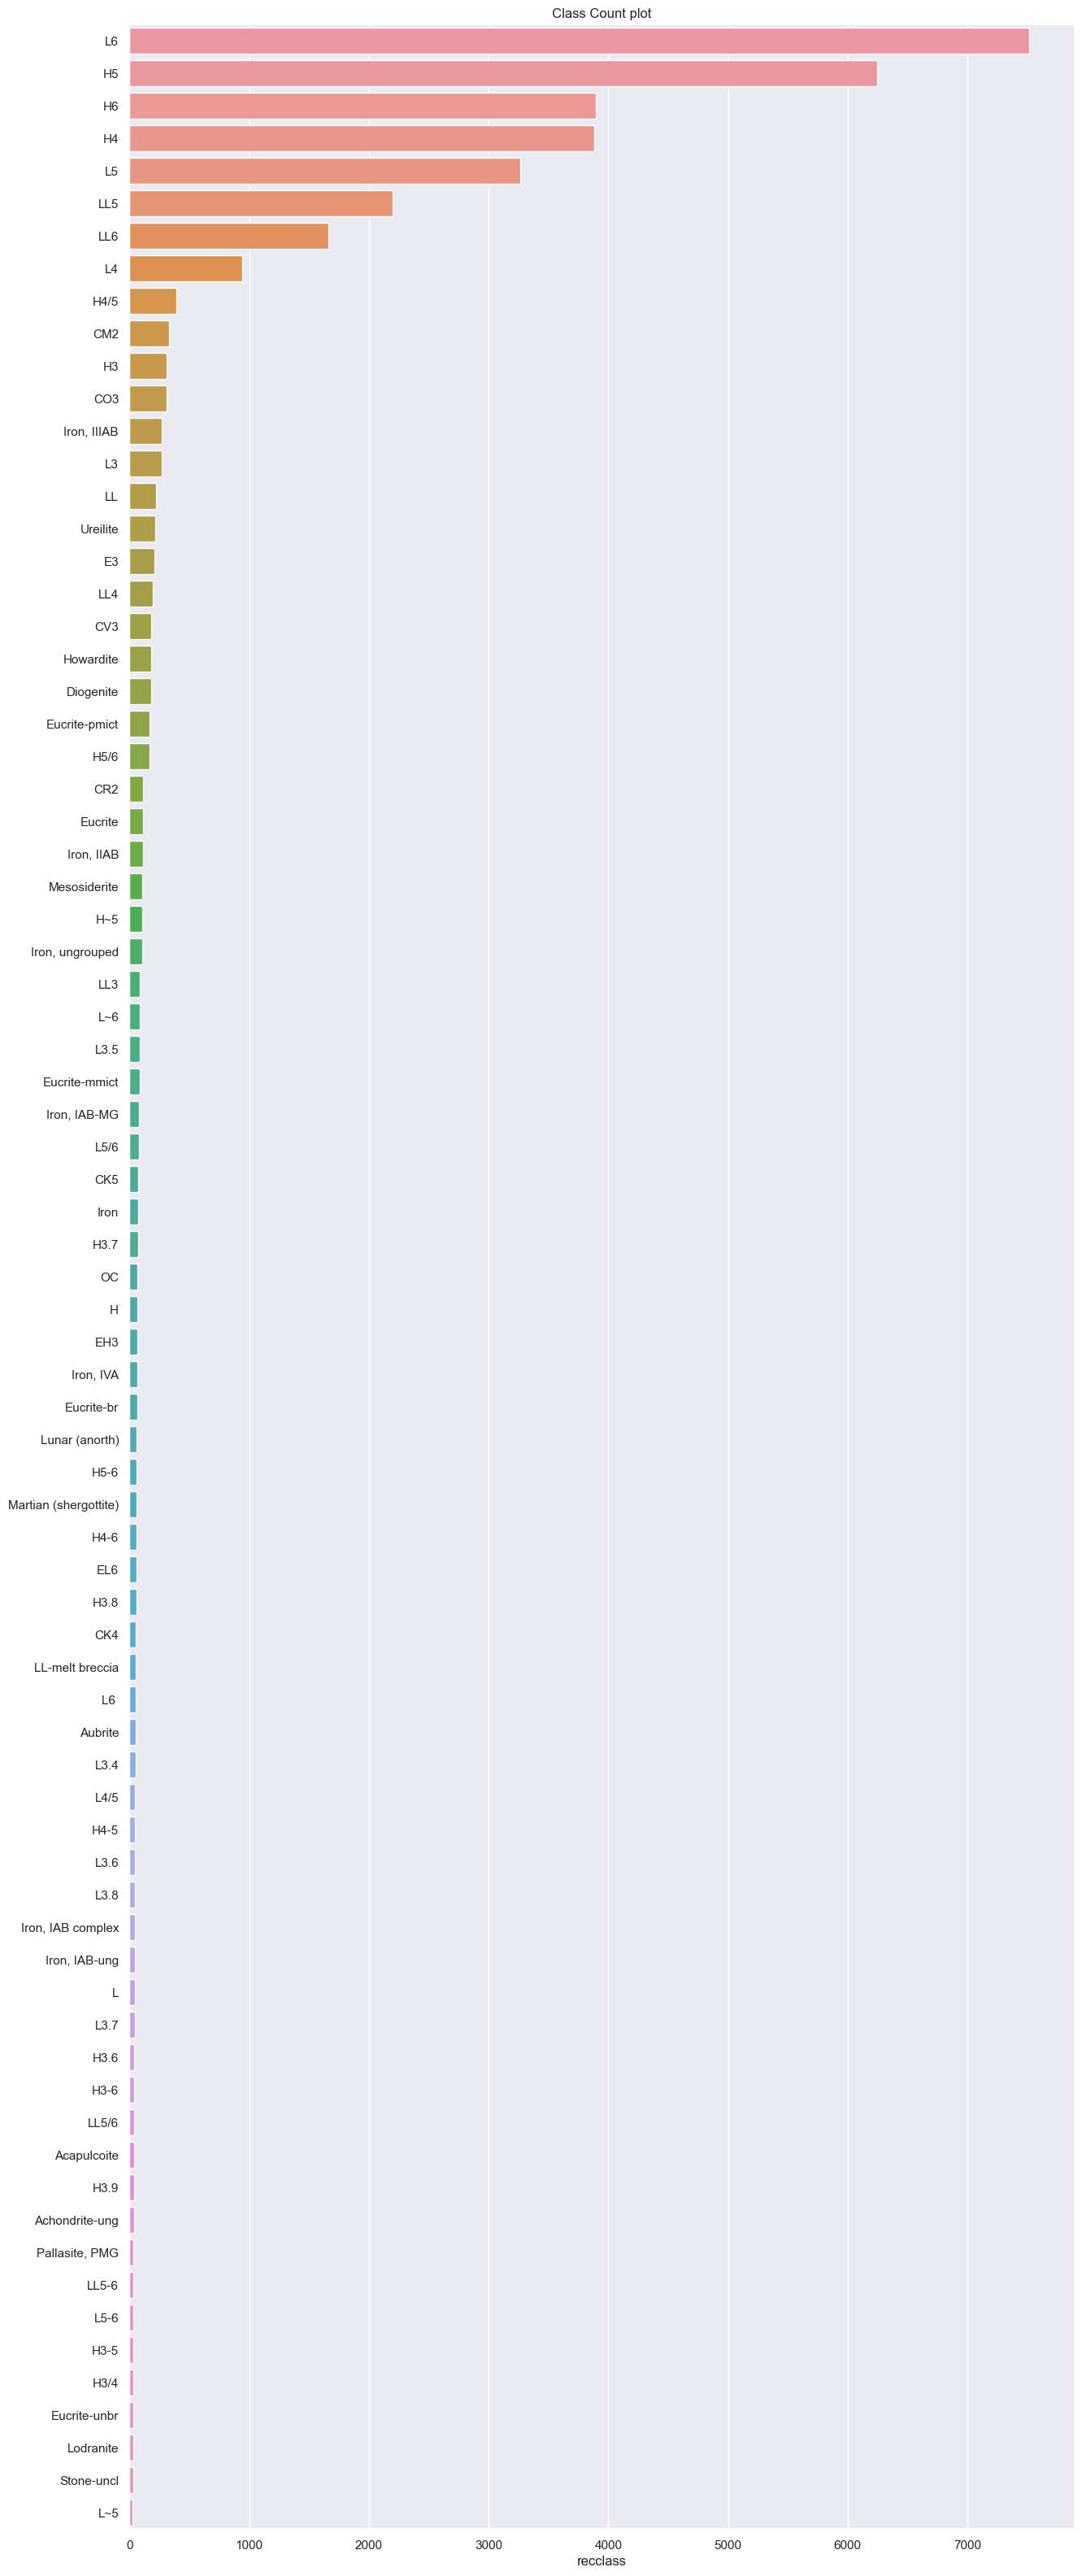

In [12]:
# Count plot for each class of meteorite
fig = plt.figure(figsize=(15,40))

value_counts = new_df['recclass'].value_counts()
classOver25 = value_counts>25

classbar = sns.barplot(data=new_df, 
                       x=value_counts[classOver25], 
                       y=value_counts[classOver25].index).set(title='Class Count plot')
;
classbar = sns.set_context("paper", font_scale=2)  


## Globe plot to show the location of the meteorites

Geopandas was used to plot the world map and a scatter plot of the meteorite strikes. The strike marker size is weighted by the mass of the meteorite. We can see from the map that all meteorites and found out land and the density of the discoveries are related to areas of high population. 

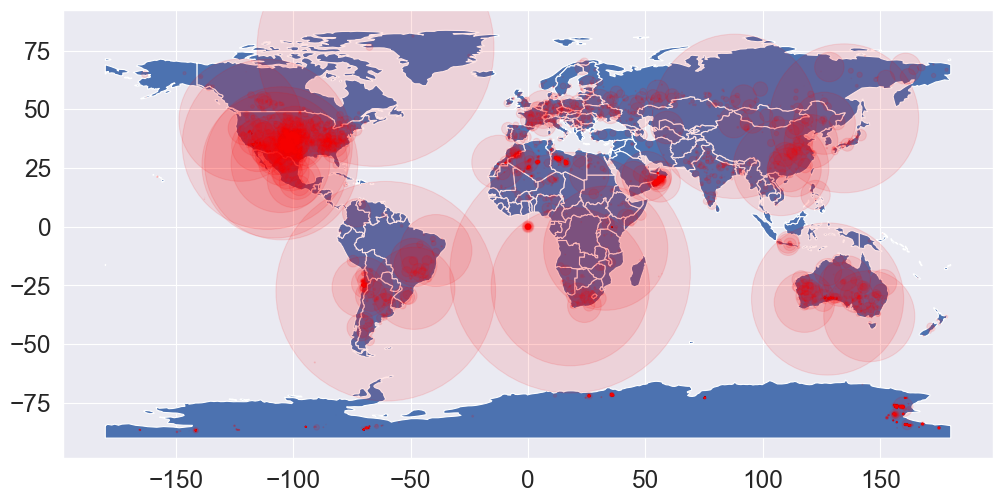

In [13]:
geometry = [Point(xy) for xy in zip(new_df['reclong'],new_df['reclat'])]

gdf = GeoDataFrame(new_df, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'));
ax1 = world.plot(figsize=(12, 12));
fig = gdf.plot(ax=ax1, marker='.', markersize=new_df['mass']/500, alpha=0.1, color='red', label='Mass');

# Conclusion

The dataset did not contain a large number of features (columns) to explore but it still provides a good exercise in visualisation. The data clearly has a sampling bias geometrically. All features were explored and visualised with appropriate type of plots. This was also an exercise in using API requests and cleaning data although the data was pretty clean to begin.